<a href="https://colab.research.google.com/github/aditi2259/Hands-on-Workshop-AIML/blob/main/AIML_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/Salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


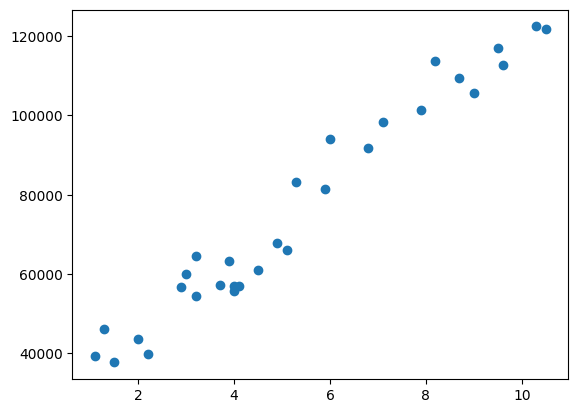

In [ ]:
plt.scatter(data['YearsExperience'],data['Salary']) #x and y are the different data parameters

Extract the input and output features

In [ ]:
X= data[['YearsExperience']] #feature extraction  #input must be 2 dim
Y= data['Salary']

In [ ]:
print(X)
print(Y)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25   

In [ ]:
#split the data into train set and test set
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#import the model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#Evaluate the model
pred = lr.predict(xtest)

In [ ]:
pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [ ]:
pd.DataFrame({'Actual prediction':ytest, 'Model prediction': pred})

,Actual prediction,Model prediction
27,112635.0,115573.622884
15,67938.0,71679.938782
23,113812.0,102498.908470
17,83088.0,75415.571471
8,64445.0,55803.499851
9,57189.0,60473.040713
28,122391.0,122110.980090
24,109431.0,107168.449332
12,56957.0,63274.765230


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(ytest,pred)

37784662.46621314

In [ ]:
mean_absolute_error(ytest,pred)

5161.328710400183

In [ ]:
#random_prediction
lr.predict([[25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([259395.48143027])

In [ ]:
#linear regression formula y=mx+c
print("m value=", lr.coef_)
print("c value=", lr.intercept_)
print("Salary when X=25:", lr.coef_*25+lr.intercept_)

m value= [9339.08172382]
c value= 25918.438334893202
Salary when X=25: [259395.48143027]


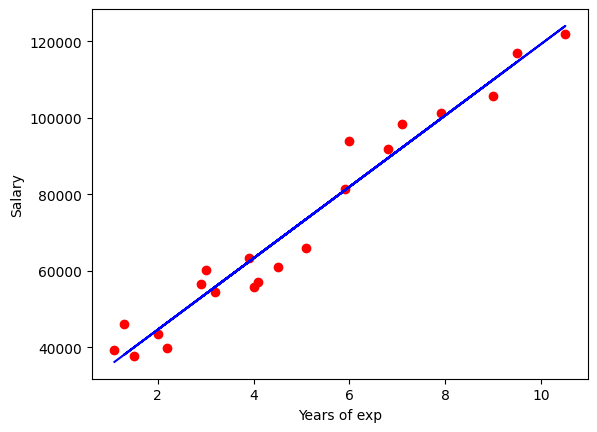

In [ ]:
#regression line fitted for the model
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lr.predict(xtrain),color='blue')
plt.xlabel('Years of exp')
plt.ylabel("Salary")
plt.show()

Multivariable Linear Regression

In [ ]:
data=pd.read_csv('/content/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


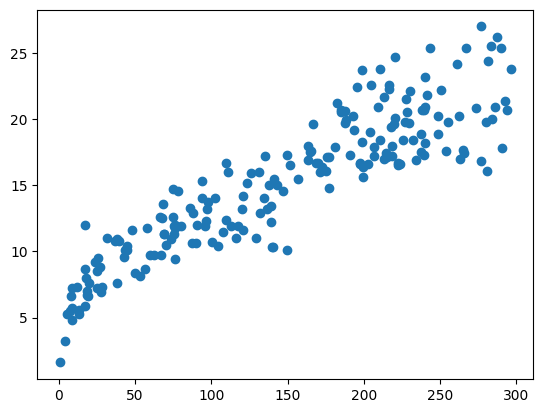

In [ ]:
plt.scatter(data['TV'],data['Sales'])

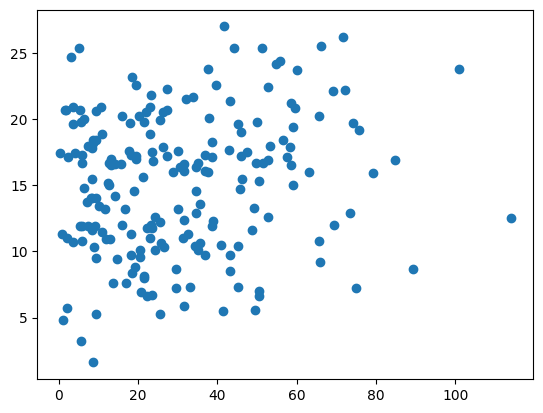

In [ ]:
plt.scatter(data['Newspaper'],data['Sales'])

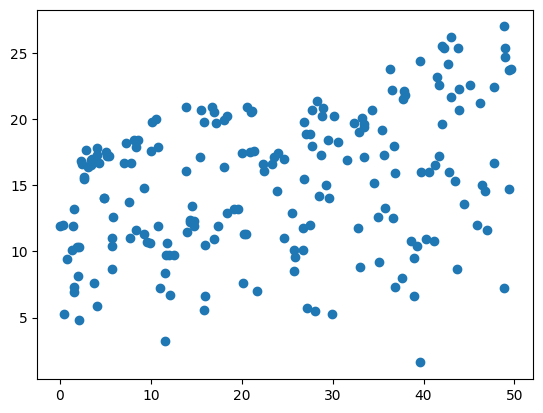

In [ ]:
plt.scatter(data['Radio'],data['Sales'])

In [ ]:
#extract input and output features
X= data[['TV','Newspaper','Radio']]
Y= data['Sales']

In [ ]:
#split the data
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#create and fit the model
lr_multi = LinearRegression()
lr_multi.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#evaluate the model
pred=lr_multi.predict(xtest)
print("mse=", mean_squared_error(ytest,pred))
print("mae=", mean_squared_error(ytest,pred))

mse= 2.541624036229147
mae= 2.541624036229147


In [ ]:
print("prediction for user inputs:",lr_multi.predict([[10,20,30]]))

prediction for user inputs: [8.51949]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#now the formula will be y=m1x1+m2x2+m2x3+c
print("M values:",lr_multi.coef_)
print("C values:",lr_multi.intercept_)

M values: [0.05358869 0.00793167 0.10270677]
C values: 4.743766701589683


In [ ]:
task_data=pd.read_csv('/content/real_estate_price_size.csv')
task_data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


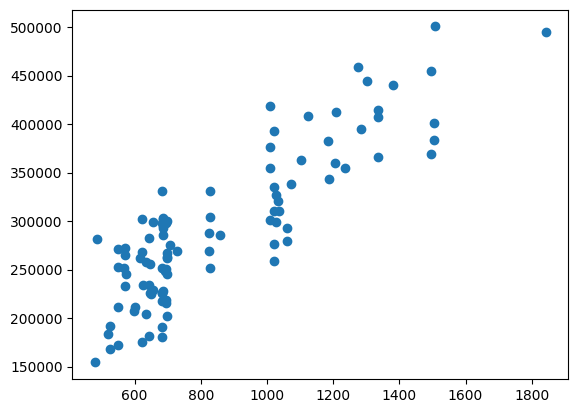

In [ ]:
plt.scatter(task_data['size'],task_data['price'])

In [ ]:
X= task_data[['size']]
Y= task_data['price']

In [ ]:
print(X)
print(Y)

       size
0    643.09
1    656.22
2    487.29
3   1504.75
4   1275.46
..      ...
95   549.80
96  1037.44
97  1504.75
98   648.29
99   705.29

[100 rows x 1 columns]
0     234314.144
1     228581.528
2     281626.336
3     401255.608
4     458674.256
         ...    
95    252460.400
96    310522.592
97    383635.568
98    225145.248
99    274922.856
Name: price, Length: 100, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
#import the model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#Evaluate the model
pred = lr.predict(xtest)

In [ ]:
pred

array([250018.14481292, 267827.22367895, 329592.94867169, 261612.21431882,
       337660.48870287, 261612.21431882, 368554.90326125, 257995.36872295,
       337660.48870287, 250018.14481292, 257995.36872295, 327152.3130257 ,
       230423.74727297, 225384.94786271, 260820.37297756, 382839.55302748,
       363516.10385098, 395156.15150258, 260820.37297756, 257995.36872295,
       431858.10268846, 241316.29155877, 234853.43795919, 287850.09770064,
       429236.83480017, 404738.06184423, 329592.94867169, 332846.42940803,
       260820.37297756, 252775.93707039])

In [ ]:
pd.DataFrame({'Actual prediction':ytest, 'Model prediction': pred})

,Actual prediction,Model prediction
83,282683.544,250018.144813
53,269523.056,267827.223679
70,276875.632,329592.948672
45,300061.480,261612.214319
44,293044.496,337660.488703
39,245747.200,261612.214319
22,412569.472,368554.903261
80,180307.216,257995.368723
10,279555.096,337660.488703
0,234314.144,250018.144813


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(ytest,pred)

1539723864.8697789

In [ ]:
mean_absolute_error(ytest,pred)

34336.874666698786

In [ ]:
#random_prediction
lr.predict([[487.29]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([217294.30370751])

In [ ]:
#linear regression formula y=mx+c
print("m value=", lr.coef_)
print("c value=", lr.intercept_)
print("price when X=487.29:", lr.coef_*487.29+lr.intercept_)

m value= [210.03749105]
c value= 114945.13469431744
price when X=487.29: [217294.30370751]


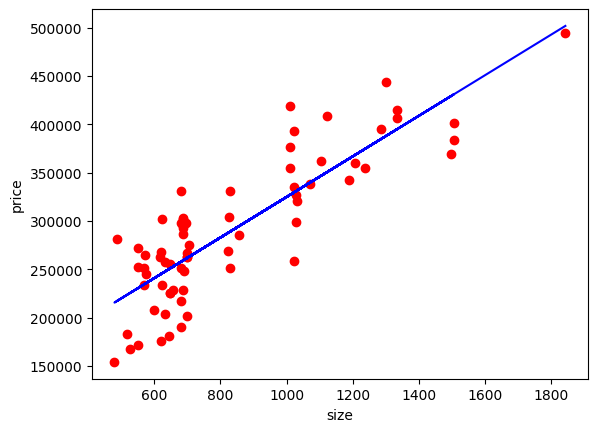

In [ ]:
#regression line fitted for the model
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lr.predict(xtrain),color='blue')
plt.xlabel('size')
plt.ylabel("price")
plt.show()

Logistic Regression


In [ ]:
data = pd.read_csv('/content/bank-full.csv')
data.shape

(45211, 17)

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#find out the categorical columns
data_cat=data.select_dtypes(object) #select only the object columns
data_num = data.select_dtypes('int64') #select only the int64 datatype column

In [ ]:
data_cat['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#Encode the categorical values to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data_cat:
  data_cat[col]=le.fit_transform(data_cat[col])

In [ ]:
data_cat['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [ ]:
data_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1
45207,5,0,0,0,0,0,0,9,3,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,3,0


In [ ]:
data_new=pd.concat([data_num,data_cat],axis=1)

In [ ]:
data_new.dtypes

,0
age,int64
balance,int64
day,int64
duration,int64
campaign,int64
pdays,int64
previous,int64
job,int64
marital,int64
education,int64


In [ ]:
data_new.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
#extract the input and output features
X= data_new.drop(['Target'],axis=1)
Y= data_new['Target'] #Y will have output features

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [ ]:
#create on logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log.score(xtest,ytest)

0.8863904452963728

In [ ]:
from sklearn.metrics import accuracy_score
pred = log.predict(xtest)
accuracy_score(ytest,pred)

0.8863904452963728

Task


In [ ]:
task_data = pd.read_csv('/content/diabetes.csv')
task_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

data_cat=data.select_dtypes(object)
data_num = data.select_dtypes('int64')

In [ ]:
data_cat['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

K nearest neighbhors


In [ ]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
data_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data_new=pd.DataFrame(data=data_cancer.data,columns=data_cancer.feature_names)
data_new['Target']=data_cancer.target
data_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#select two features for the model
X= data_new[['mean radius','mean texture']]
Y= data_new['Target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)


KNeighborsClassifier()

In [ ]:
knn.score(xtest,ytest)

0.8771929824561403

In [ ]:
from sklearn.metrics import accuracy_score
pred=knn.predict(xtest)
accuracy_score(ytest,pred)

0.8771929824561403

In [ ]:
from sklearn.svm import SVC
SVM= SVC(kernel='linear')
SVM.fit(xtrain,ytrain)

SVC(kernel='linear')

In [ ]:
SVM.score(xtest,ytest)

0.9064327485380117

In [ ]:
import numpy as np

In [ ]:
x_min,x_max = xtrain.iloc[:,0].min() -1, xtrain.iloc[:,0].max() +1
y_min,y_max = xtrain.iloc[:,1].min() -1, xtrain.iloc[:,1].max() +1
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
#predict the grid
Z= knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


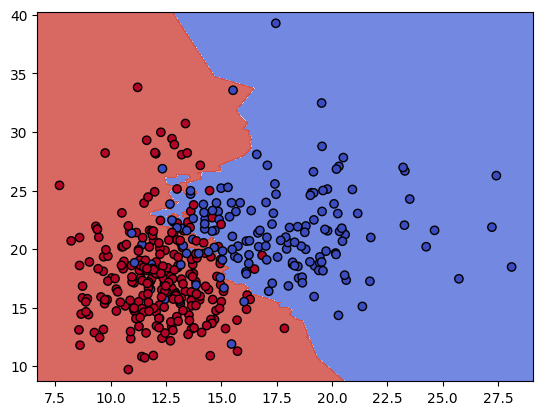

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx,yy,Z,alpha=0.8,cmap='coolwarm')
plt.scatter(xtrain.iloc[:,0],xtrain.iloc[:,1],c=ytrain,edgecolor='k',cmap='coolwarm')

In [ ]:
from sklearn.svm import SVC
SVM= SVC(kernel='linear')
SVM.fit(xtrain,ytrain)

SVC(kernel='linear')

Support Vector Machines


In [ ]:
SVM.score(xtest,ytest)

0.9064327485380117

In [ ]:
import matplotlib.pyplot as plt


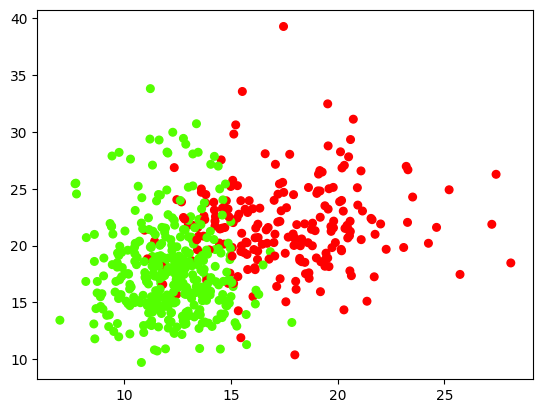

In [ ]:
plt.scatter(data_new.iloc[:,0], data_new.iloc[:,1],c=data_new['Target'],s=30,cmap=plt.cm.prism)
#creates the axis bounds for the grid
axis =plt.gca()
x_limit=axis.get_xlim()
y_limit=axis.get_ylim()

In [140]:
import numpy as np
x=np.linspace(x_limit[0],x_limit[1],50)
y=np.linspace(y_limit[0],y_limit[1],50)
X,Y = np.meshgrid(x,y)
xy = np.c_[X.ravel(),Y.ravel()]

In [139]:
#creates the decision line for the datapoints,use model.predict
decision_line = SVM.decision_function(xy).reshape(Y.shape)

#plot the decision line and the margins
axis.contour(X,Y,decision_line,colors ='k', levels=[0] ,linestyles=['-'])

axis.scatter(SVM.support_vectors_[:,0],SVM.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: cannot reshape array of size 2500 into shape (150,)

In [138]:
#decision tree

In [ ]:
task_data = pd.read_csv('/content/loan_prediction.csv')
task_data.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]>

In [ ]:
task_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
task_data.shape

(614, 13)

In [ ]:
task_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
data_clean = task_data.dropna()
data_clean.shape

(480, 13)

In [ ]:
data_clean.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


Decision Tree

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data= pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names)
data['Species']=iris_data.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

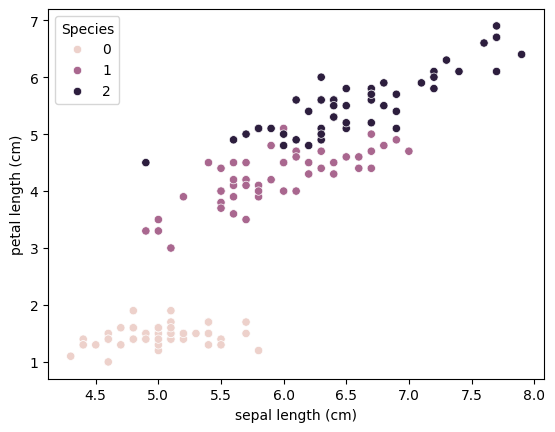

In [ ]:
import seaborn as sns
sns.scatterplot(x='sepal length (cm)',y='petal length (cm)',data=data,hue='Species')

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['Species'],axis=1)
Y = data['Species']
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

1.0


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[

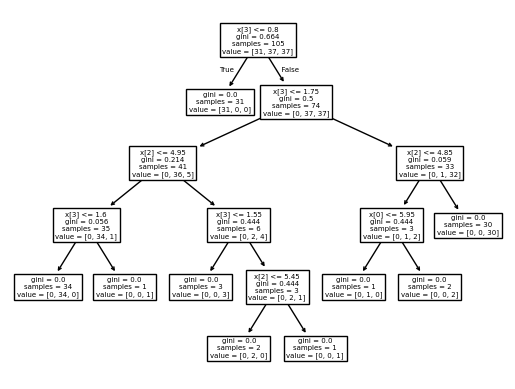

In [ ]:
tree.plot_tree(model)

Unsupervised Learning
#Kmeans



In [ ]:
data= pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = data[['Annual Income (k$)','Spending Score (1-100)']]

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

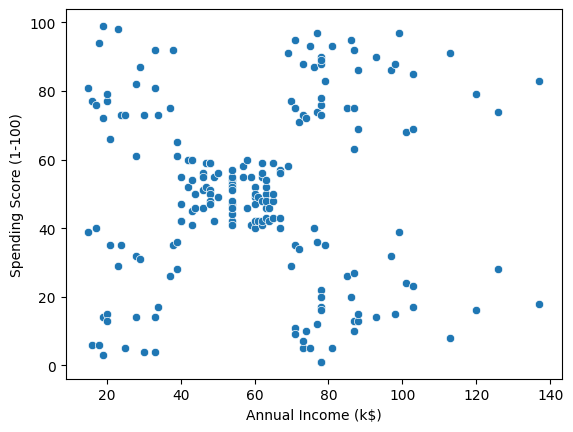

In [ ]:
import seaborn as sns
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [ ]:
from sklearn.cluster import KMeans
Km = KMeans(n_clusters=5)
Km.fit(df)
clusters = Km.predict(df)
df['Clusters']=clusters

<ipython-input-96-7d255f3f785d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters']=clusters


In [ ]:
df

,Annual Income (k$),Spending Score (1-100),Clusters
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

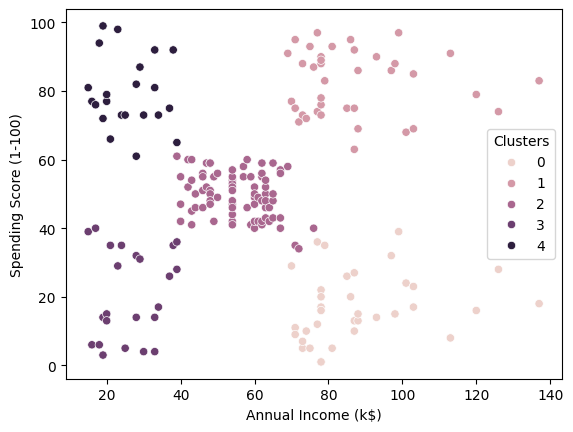

In [ ]:
sns.scatterplot(x='Annual Income (k$)' ,y='Spending Score (1-100)',data=df,hue='Clusters')

In [101]:
#Artificial Neural Network

In [102]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import numpy as np

In [132]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [104]:
print("Training samples:",xtrain.shape)
print("testing samples:",xtest.shape)

Training samples: (60000, 28, 28)
testing samples: (10000, 28, 28)


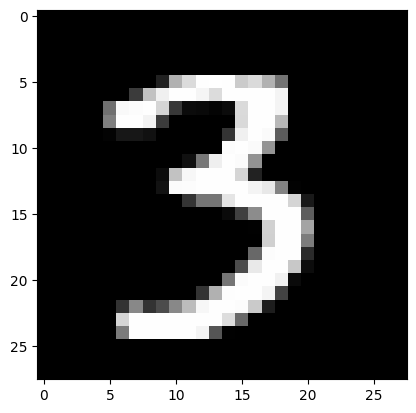

In [110]:
plt.imshow(xtrain[10000],cmap='Greys_r')

In [115]:
print("Label of the image:",ytrain[10000])

Label of the image: 3


In [133]:
#reshaping the length and width dimensions to total no of pixels
xtrain = xtrain.reshape(len(xtrain),28*28)
xtest = xtest.reshape(len(xtest),28*28)
print(xtrain.shape,'train samples')
print(xtest.shape,'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [134]:
#data normalization
print("Before scaling:",xtrain.max())
print("Before Scaling min:",xtrain.min())
xtrain= xtrain/255
xtest = xtest/255
print("After scaling:",xtrain.max())
print("After Scaling min:",xtrain.min())

Before scaling: 255
Before Scaling min: 0
After scaling: 1.0
After Scaling min: 0.0


In [135]:
#labels are integer encoded
print("before encoding the label",ytrain[333])
#after encoding
num_classes=10
import tensorflow
ytrain= tensorflow.keras.utils.to_categorical(ytrain,num_classes)
ytest= tensorflow.keras.utils.to_categorical(ytest,num_classes)
print("After encoding the label",ytrain[333])


before encoding the label 8
After encoding the label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [136]:
#Neural network creation
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax')) #output layer

model.compile(loss="categorical_crossentropy",optimizer=RMSprop(learning_rate=0.01),metrics=['accuracy'])

In [137]:
#train the model
model.fit(xtrain,ytrain,batch_size=128,
          epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7743 - loss: 0.7255 - val_accuracy: 0.9379 - val_loss: 0.1977
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9193 - loss: 0.2863 - val_accuracy: 0.9400 - val_loss: 0.2075
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9273 - loss: 0.2580 - val_accuracy: 0.9544 - val_loss: 0.1571
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9323 - loss: 0.2479 - val_accuracy: 0.9590 - val_loss: 0.1647
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9366 - loss: 0.2272 - val_accuracy: 0.9574 - val_loss: 0.1584
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9391 - loss: 0.2264 - val_accuracy: 0.9619 - val_loss: 0.1516
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9392 - loss: 0.2305 - val_accuracy: 0.9612 - val_loss: 0.1566
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9396 - loss: 0.2291 - val_accuracy: 0.

In [141]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D,Activation,MaxPool2D,Flatten

In [142]:
(xtrain,ytrain),(xtest,ytest)= cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [143]:
xtrain.shape

(50000, 32, 32, 3)

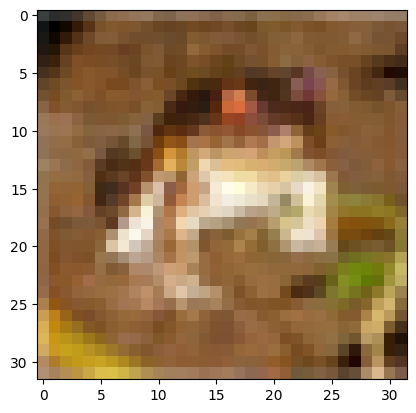

In [144]:
plt.imshow(xtrain[0])

In [145]:
#data normalisation
xtrain=xtrain/255
xtest=xtest/255
print("max=",xtrain.max())
print("min=",xtrain.min())

max= 1.0
min= 0.0


In [148]:
import tensorflow as tf

In [149]:
#labels are integer encoded
print('before encoding the label',ytrain[333])
#after encoding
num_classes=10
ytrain = tf.keras.utils.to_categorical(ytrain,num_classes)
ytest = tf.keras.utils.to_categorical(ytest,num_classes)
print("After encoding the label",ytrain[333])

before encoding the label [3]
After encoding the label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
CNN_model = Sequential()
CNN_model.add(Convo2D(filters=32,kernel_size=(5,5),input_shape=(32,32,3),activation='relu'))
CNN_model=add(MaxPool2D(pool_size=(2,2)))